In [1]:
from jammer_power import *

for i in list_nu_p:
    i.calculate_p_avg()

Pavg = 0.9750000000000001
Pavg = 2.0
Pavg = 2.9749999999999996
Pavg = 4.0
Pavg = 4.95
Pavg = 5.949999999999999
Pavg = 7.0
Pavg = 8.075
Pavg = 9.0


In [1]:
# Change d_t from 1 to 9
from parameters import *
from simulation.greedy_strategy import GreedyStrategy

for i in range(10):
    greedy = GreedyStrategy(d_t=i+1)
    greedy.run()

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5746
Avg throughput (packages/time unit) = 1.1492
Avg loss (packages/time unit) = 1.8508
PDR = 38.28114590273151%
---------------------------------------------------
Total packages send = 15010
Loss packages = 9254
Success packages = 5746
Package still in queue = 10
csv/greedy_throughput.csv created with 2 columns.
csv/greedy_loss.csv created with 2 columns.
csv/greedy_pdr.csv created with 2 columns.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5759
Avg throughput (packages/time unit) = 1.1518
Avg loss (packages/time unit) = 1.8748
PDR = 38.030773294591555%
---------------------------------------------------
Total packages send = 15143
Loss packages = 9374
Success packages = 5759
Package still in queue = 10
csv/greedy_throughput.csv already exists.
csv/gree

/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavi

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5705
Avg throughput (packages/time unit) = 1.141
Avg loss (packages/time unit) = 1.8668
PDR = 37.90949564755133%
---------------------------------------------------
Total packages send = 15049
Loss packages = 9334
Success packages = 5705
Package still in queue = 10
csv/greedy_throughput.csv already exists.
csv/greedy_loss.csv already exists.
csv/greedy_pdr.csv already exists.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5745
Avg throughput (packages/time unit) = 1.149
Avg loss (packages/time unit) = 1.8396
PDR = 38.42038386945764%
---------------------------------------------------
Total packages send = 14953
Loss packages = 9198
Success packages = 5745
Package still in queue = 10
csv/greedy_throughput.csv already exists.
csv/greedy_loss.csv already exists.

In [1]:
# Greedy change Pavg from 1W to 9W
# Change d_t from 1 to 9
from parameters import *
from simulation.greedy_strategy import GreedyStrategy
from jammer_power import *

for i in range(9):
    jammer_power = list_nu_p[i]
    greedy = GreedyStrategy()
    greedy.set_jammer_power(i+1, nu=jammer_power.nu, nu_p=jammer_power.nu_p)
    greedy.run()

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5741
Avg throughput (packages/time unit) = 1.1482
Avg loss (packages/time unit) = 1.8208
PDR = 38.64692022887917%
---------------------------------------------------
Total packages send = 14855
Loss packages = 9104
Success packages = 5741
Package still in queue = 10
csv/greedy_power_throughput.csv created with 2 columns.
csv/greedy_power_loss.csv created with 2 columns.
csv/greedy_power_pdr.csv created with 2 columns.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5756
Avg throughput (packages/time unit) = 1.1512
Avg loss (packages/time unit) = 1.9012
PDR = 37.68988999476166%
---------------------------------------------------
Total packages send = 15272
Loss packages = 9506
Success packages = 5756
Package still in queue = 10
csv/greedy_power_throughput.csv a

/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavi

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5713
Avg throughput (packages/time unit) = 1.1426
Avg loss (packages/time unit) = 1.816
PDR = 38.59352833885023%
---------------------------------------------------
Total packages send = 14803
Loss packages = 9080
Success packages = 5713
Package still in queue = 10
csv/greedy_power_throughput.csv already exists.
csv/greedy_power_loss.csv already exists.
csv/greedy_power_pdr.csv already exists.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5754
Avg throughput (packages/time unit) = 1.1508
Avg loss (packages/time unit) = 1.8934
PDR = 37.77821548158361%
---------------------------------------------------
Total packages send = 15231
Loss packages = 9467
Success packages = 5754
Package still in queue = 10
csv/greedy_power_throughput.csv already exists.
csv/greedy

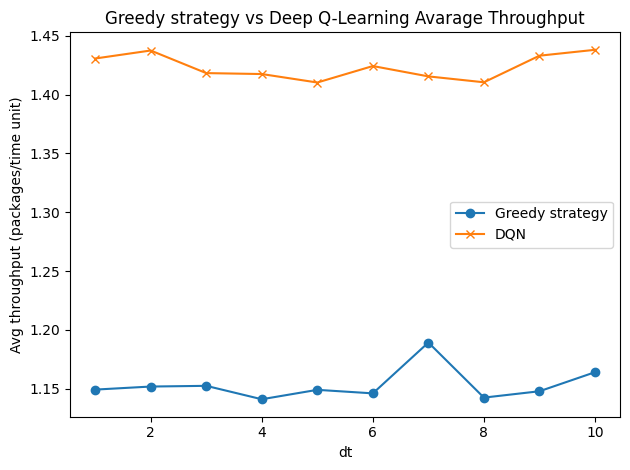

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_htt_throughput = pd.read_csv('csv/greedy_throughput.csv')
df_dqn_throughput = pd.read_csv('csv/ddqn_throughput.csv')

plt.plot(df_htt_throughput['d_t'], df_htt_throughput['throughput'], marker='o', label='Greedy strategy')
plt.plot(df_dqn_throughput['d_t'], df_dqn_throughput['throughput'], marker='x', label='DQN')
plt.xlabel('dt')
plt.ylabel('Avg throughput (packages/time unit)')
plt.title('Greedy strategy vs Deep Q-Learning Avarage Throughput')
plt.tight_layout()
plt.legend()
plt.show()

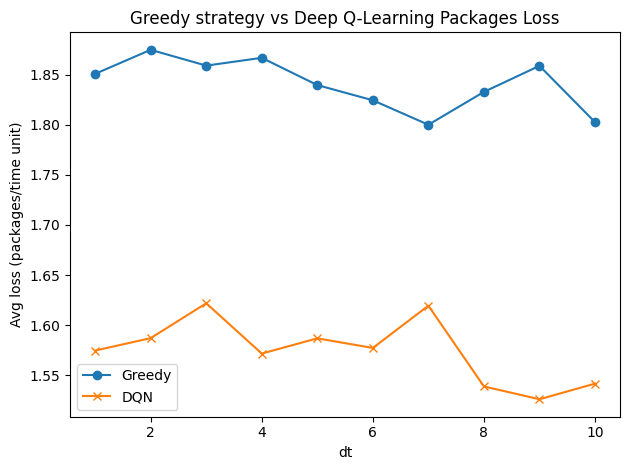

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_htt_loss = pd.read_csv('csv/greedy_loss.csv')
df_ddqn_loss = pd.read_csv('csv/ddqn_loss.csv')

plt.plot(df_htt_loss['d_t'], df_htt_loss['package_loss'], marker='o', label='Greedy')
plt.plot(df_ddqn_loss['d_t'], df_ddqn_loss['package_loss'], marker='x', label='DQN')
plt.xlabel('dt')
plt.ylabel('Avg loss (packages/time unit)')
plt.title('Greedy strategy vs Deep Q-Learning Packages Loss')
plt.tight_layout()
plt.legend()
plt.show()

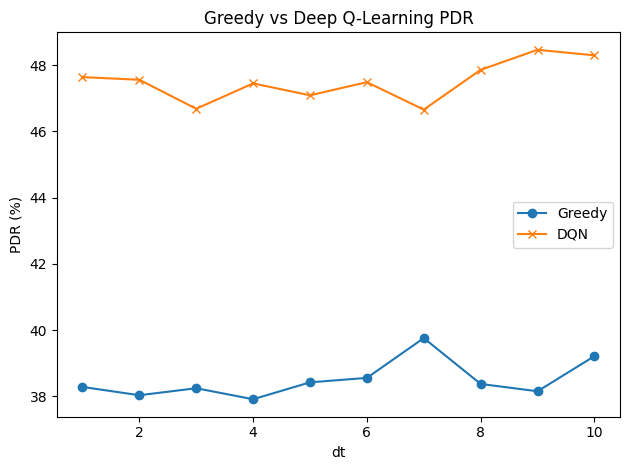

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df_htt_loss = pd.read_csv('csv/greedy_pdr.csv')
df_ddqn_loss = pd.read_csv('csv/ddqn_pdr.csv')

plt.plot(df_htt_loss['d_t'], df_htt_loss['pdr'], marker='o', label='Greedy')
plt.plot(df_ddqn_loss['d_t'], df_ddqn_loss['pdr'], marker='x', label='DQN')
plt.xlabel('dt')
plt.ylabel('PDR (%)')
plt.title('Greedy vs Deep Q-Learning PDR')
plt.tight_layout()
plt.legend()
plt.show()

Greedy and DQN with Pavg change from 1W to 9W


In [ ]:
# Create greedy strategy and dqn avg throughput csv file
import pandas as pd

p_avg_range = {'p_avg': range(1, 10)}
greedy_dqn_throughput_df = pd.DataFrame(p_avg_range)
greedy_dqn_throughput_df.to_csv('csv/greedy_dqn_throughput.csv', index=False)

greedy_dqn_loss_df = pd.DataFrame(p_avg_range)
greedy_dqn_loss_df.to_csv('csv/greedy_dqn_loss.csv', index=False)

greedy_dqn_pdr_df = pd.DataFrame(p_avg_range)
greedy_dqn_pdr_df.to_csv('csv/greedy_dqn_pdr.csv', index=False)


In [ ]:
# Run greedy strategy and insert result to file
from jammer_power import *
from simulation.greedy_strategy import GreedyStrategy

greedy_dqn_throughput_df = pd.read_csv('csv/greedy_dqn_throughput.csv')
greedy_dqn_loss_df = pd.read_csv('csv/greedy_dqn_loss.csv')
greedy_dqn_pdr_df = pd.read_csv('csv/greedy_dqn_pdr.csv')

greedy_dqn_throughput_df['greedy'] = 0
greedy_dqn_loss_df['greedy'] = 0
greedy_dqn_pdr_df['greedy'] = 0

for i in range(0, 9):
    power = list_nu_p[i]
    greedy = GreedyStrategy()
    greedy.set_jammer_power(nu=power.nu, nu_p=power.nu_p)
    throughput, loss, pdr = greedy.run()

    greedy_dqn_throughput_df.loc[greedy_dqn_throughput_df['p_avg'] == i + 1, 'greedy'] = throughput
    greedy_dqn_loss_df.loc[greedy_dqn_loss_df['p_avg'] == i + 1, 'greedy'] = loss
    greedy_dqn_pdr_df.loc[greedy_dqn_pdr_df['p_avg'] == i + 1, 'greedy'] = pdr
    
# Save result
greedy_dqn_throughput_df.to_csv('csv/greedy_dqn_throughput.csv', index=False)
greedy_dqn_loss_df.to_csv('csv/greedy_dqn_loss.csv', index=False)
greedy_dqn_pdr_df.to_csv('csv/greedy_dqn_pdr.csv', index=False)

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 784
Avg throughput (packages/time unit) = 0.1568
Avg loss (packages/time unit) = 2.8422
PDR = 5.22492502499167%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 1612
Avg throughput (packages/time unit) = 0.3224
Avg loss (packages/time unit) = 2.6808
PDR = 10.728071343005457%


C:\Users\dungh\AppData\Local\Temp\ipykernel_15292\275482722.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1568' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  greedy_dqn_throughput_df.loc[greedy_dqn_throughput_df['p_avg'] == i + 1, 'greedy'] = throughput
C:\Users\dungh\AppData\Local\Temp\ipykernel_15292\275482722.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.8422' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  greedy_dqn_loss_df.loc[greedy_dqn_loss_df['p_avg'] == i + 1, 'greedy'] = loss
C:\Users\dungh\AppData\Local\Temp\ipykernel_15292\275482722.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.22492502499167' has dtype incompatible wit

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 2432
Avg throughput (packages/time unit) = 0.4864
Avg loss (packages/time unit) = 2.506
PDR = 16.243654822335024%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 3147
Avg throughput (packages/time unit) = 0.6294
Avg loss (packages/time unit) = 2.3694
PDR = 20.97440682484671%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 3996
Avg throughput (packages/time unit) = 0.7992
Avg loss (packages/time unit) = 2.2028
PDR = 26.60452729693742%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 4704
Avg throughput (packages/time unit) = 0.9408
Avg loss (packages/time unit) = 2.012
PDR = 31.84187

In [7]:
# Run dqn and insert result to file
from jammer_power import *
from simulation.ddqn_simulation import DDQNSimulate
import pandas as pd

greedy_dqn_throughput_df = pd.read_csv('csv/greedy_dqn_throughput.csv')
greedy_dqn_loss_df = pd.read_csv('csv/greedy_dqn_loss.csv')
greedy_dqn_pdr_df = pd.read_csv('csv/greedy_dqn_pdr.csv')

greedy_dqn_throughput_df['dqn'] = 0
greedy_dqn_loss_df['dqn'] = 0
greedy_dqn_pdr_df['dqn'] = 0

list_model = [
    'model/dqn_1W.keras',
    'model/dqn_2W.keras',
    'model/dqn_3W.keras',
    'model/dqn_4W.keras',
    'model/dqn_5W.keras',
    'model/dqn_6W.keras',
    'model/dqn_7W.keras',
    'model/dqn_8W.keras',
    'model/dqn_9W.keras',
]

for i in range(0, 2):
    power = list_nu_p[i]
    model_file_name = list_model[i]
    dqn_simulate = DDQNSimulate(model=model_file_name)
    dqn_simulate.set_jammer_power(nu=power.nu, nu_p=power.nu_p)
    throughput, loss, pdr = dqn_simulate.run()

    greedy_dqn_throughput_df.loc[greedy_dqn_throughput_df['p_avg'] == i + 1, 'dqn'] = throughput
    greedy_dqn_loss_df.loc[greedy_dqn_loss_df['p_avg'] == i + 1, 'dqn'] = loss
    greedy_dqn_pdr_df.loc[greedy_dqn_pdr_df['p_avg'] == i + 1, 'dqn'] = pdr
    
# Save result
greedy_dqn_throughput_df.to_csv('csv/greedy_dqn_throughput.csv', index=False)
greedy_dqn_loss_df.to_csv('csv/greedy_dqn_loss.csv', index=False)
greedy_dqn_pdr_df.to_csv('csv/greedy_dqn_pdr.csv', index=False)

---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 970
Number packages sent successfully = 980
Avg throughput (packages/time unit) = 0.194
Avg loss (packages/time unit) = 2.783
PDR = 6.579389056730446%
---------------------------------------------------


C:\Users\dungh\AppData\Local\Temp\ipykernel_12620\2721899857.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  greedy_dqn_throughput_df.loc[greedy_dqn_throughput_df['p_avg'] == i + 1, 'dqn'] = throughput
C:\Users\dungh\AppData\Local\Temp\ipykernel_12620\2721899857.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.783' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  greedy_dqn_loss_df.loc[greedy_dqn_loss_df['p_avg'] == i + 1, 'dqn'] = loss
C:\Users\dungh\AppData\Local\Temp\ipykernel_12620\2721899857.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.579389056730446' has dtype incompatible with in

---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 2087
Number packages sent successfully = 2097
Avg throughput (packages/time unit) = 0.4174
Avg loss (packages/time unit) = 2.5774
PDR = 13.994927923117991%
---------------------------------------------------


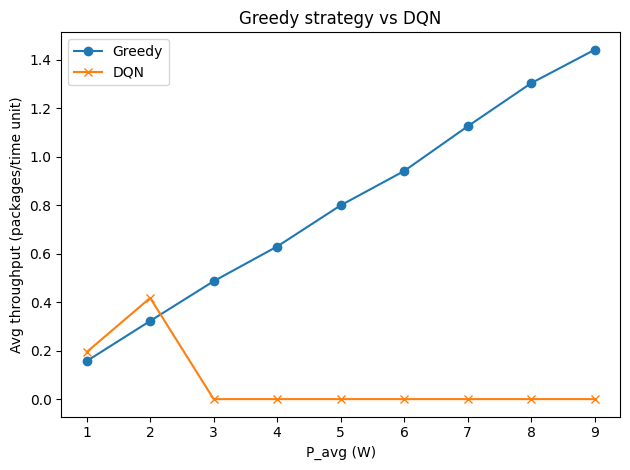

In [8]:
# Plot throughput graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/greedy_dqn_throughput.csv')

plt.plot(df['p_avg'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['p_avg'], df['dqn'], marker='x', label='DQN')
plt.title('Greedy strategy vs DQN')
plt.xlabel('P_avg (W)')
plt.ylabel('Avg throughput (packages/time unit)')
plt.tight_layout()
plt.legend()
plt.show()

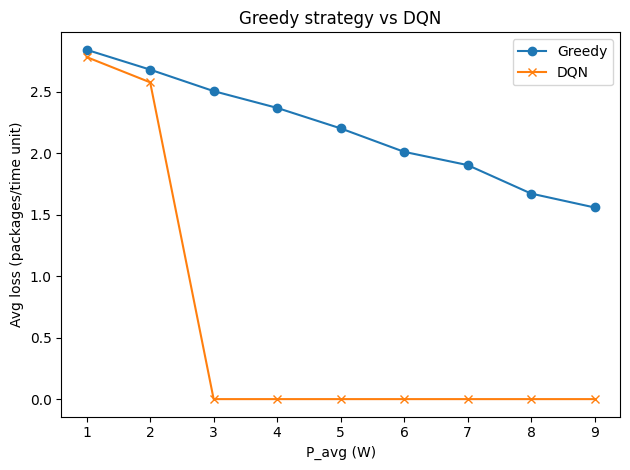

In [9]:
# Plot loss graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/greedy_dqn_loss.csv')

plt.plot(df['p_avg'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['p_avg'], df['dqn'], marker='x', label='DQN')
plt.title('Greedy strategy vs DQN')
plt.xlabel('P_avg (W)')
plt.ylabel('Avg loss (packages/time unit)')
plt.tight_layout()
plt.legend()
plt.show()

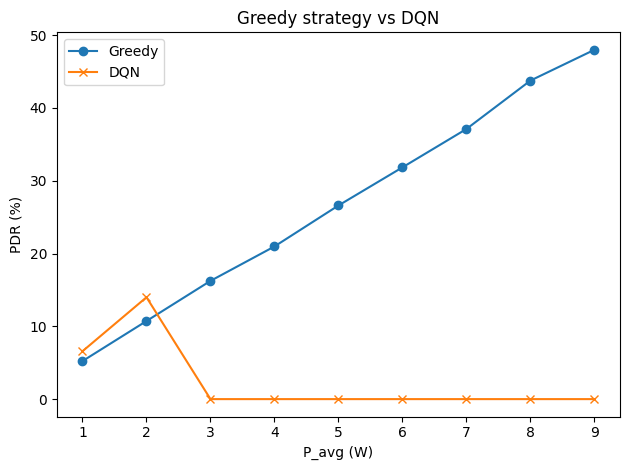

In [10]:
# Plot pdr graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/greedy_dqn_pdr.csv')

plt.plot(df['p_avg'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['p_avg'], df['dqn'], marker='x', label='DQN')
plt.title('Greedy strategy vs DQN')
plt.xlabel('P_avg (W)')
plt.ylabel('PDR (%)')
plt.tight_layout()
plt.legend()
plt.show()